In [2]:

import os
import math
import numpy as np
import pandas as pd
from sklearn import tree
from sklearn import datasets
from sklearn.ensemble import GradientBoostingRegressor
from pydotplus import graph_from_dot_data
from IPython.display import Image
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import export_graphviz
from xgboost import XGBRegressor

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [3]:
cereal = pd.read_csv('./cereal.csv')
print(cereal[pd.isna(cereal)].head(5))

  name  mfr type  calories  protein  fat  sodium  fiber  carbo  sugars  \
0  NaN  NaN  NaN       NaN      NaN  NaN     NaN    NaN    NaN     NaN   
1  NaN  NaN  NaN       NaN      NaN  NaN     NaN    NaN    NaN     NaN   
2  NaN  NaN  NaN       NaN      NaN  NaN     NaN    NaN    NaN     NaN   
3  NaN  NaN  NaN       NaN      NaN  NaN     NaN    NaN    NaN     NaN   
4  NaN  NaN  NaN       NaN      NaN  NaN     NaN    NaN    NaN     NaN   

   potass  vitamins  shelf  weight  cups  rating  
0     NaN       NaN    NaN     NaN   NaN     NaN  
1     NaN       NaN    NaN     NaN   NaN     NaN  
2     NaN       NaN    NaN     NaN   NaN     NaN  
3     NaN       NaN    NaN     NaN   NaN     NaN  
4     NaN       NaN    NaN     NaN   NaN     NaN  


In [4]:
cereal = cereal.dropna()
print(cereal.head(5))

                        name mfr type  calories  protein  fat  sodium  fiber  \
0                  100% Bran   N    C        70        4    1     130   10.0   
1          100% Natural Bran   Q    C       120        3    5      15    2.0   
2                   All-Bran   K    C        70        4    1     260    9.0   
3  All-Bran with Extra Fiber   K    C        50        4    0     140   14.0   
4             Almond Delight   R    C       110        2    2     200    1.0   

   carbo  sugars  potass  vitamins  shelf  weight  cups     rating  
0    5.0       6     280        25      3     1.0  0.33  68.402973  
1    8.0       8     135         0      3     1.0  1.00  33.983679  
2    7.0       5     320        25      3     1.0  0.33  59.425505  
3    8.0       0     330        25      3     1.0  0.50  93.704912  
4   14.0       8      -1        25      3     1.0  0.75  34.384843  


In [5]:
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(cereal['mfr'])
cereal['mfr'] = integer_encoded

In [6]:
integer_encoded = label_encoder.fit_transform(cereal['type'])
cereal['type'] = integer_encoded

In [7]:
print(cereal.head(5))

                        name  mfr  type  calories  protein  fat  sodium  \
0                  100% Bran    3     0        70        4    1     130   
1          100% Natural Bran    5     0       120        3    5      15   
2                   All-Bran    2     0        70        4    1     260   
3  All-Bran with Extra Fiber    2     0        50        4    0     140   
4             Almond Delight    6     0       110        2    2     200   

   fiber  carbo  sugars  potass  vitamins  shelf  weight  cups     rating  
0   10.0    5.0       6     280        25      3     1.0  0.33  68.402973  
1    2.0    8.0       8     135         0      3     1.0  1.00  33.983679  
2    9.0    7.0       5     320        25      3     1.0  0.33  59.425505  
3   14.0    8.0       0     330        25      3     1.0  0.50  93.704912  
4    1.0   14.0       8      -1        25      3     1.0  0.75  34.384843  


In [8]:
X = cereal[cereal.columns[1:-1]]
y = cereal[cereal.columns[-1]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0, shuffle=True)

In [9]:
clf = GradientBoostingRegressor(random_state=0, max_depth = 2, n_estimators = 15, learning_rate=1)
clf.fit(X_train, y_train)

temp = pd.DataFrame()
temp['predict'] = clf.predict(X_test)
temp['true'] = np.array(y_test)

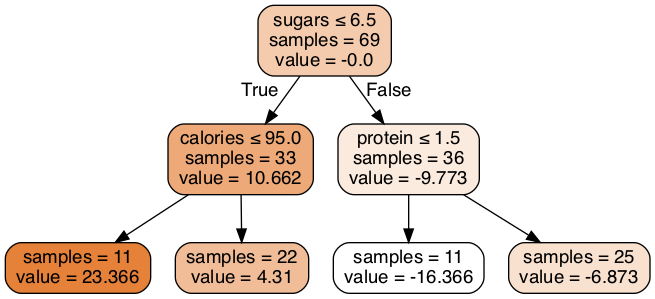

In [10]:
# Get the tree number 0
sub_tree_42 = clf.estimators_[0, 0]

# Visualization
# Install graphviz: https://www.graphviz.org/download/
from pydotplus import graph_from_dot_data
from IPython.display import Image
dot_data = export_graphviz(
    sub_tree_42,
    out_file=None, filled=True, rounded=True,
    special_characters=True, feature_names = cereal.columns[1:-1],
    proportion=False, impurity=False, # enable them if you want
)
graph = graph_from_dot_data(dot_data)
Image(graph.create_png())

In [11]:
print(temp)

     predict       true
0  20.919995  29.924285
1  47.684574  49.787445
2  38.740655  39.703400
3  66.838458  60.756112
4  49.923249  45.811716
5  44.908449  58.345141
6  65.388273  59.363993
7  47.158322  53.371007


In [12]:
print('GDBT: ' + str(clf.score(X_test, y_test)))


GDBT: 0.5113751976852156


In [13]:
xgb = XGBRegressor()
xgb.fit(X_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [14]:
temp = pd.DataFrame()
temp['predict'] = xgb.predict(X_test)
temp['true'] = np.array(y_test)

In [15]:
print(temp)

     predict       true
0  26.386175  29.924285
1  46.594707  49.787445
2  38.414635  39.703400
3  64.864243  60.756112
4  46.487354  45.811716
5  46.559700  58.345141
6  59.076935  59.363993
7  46.082249  53.371007


In [16]:
print('XGB: ' + str(xgb.score(X_test, y_test)))

XGB: 0.7113254034015424


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


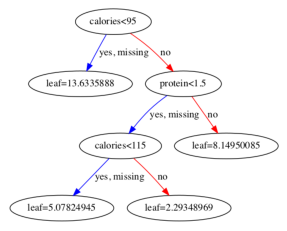

In [17]:
from xgboost import plot_tree
import matplotlib.pyplot as plt
plot_tree(xgb, num_trees=1)
# plt.savefig('xgb.png')
plt.show()


In [18]:

xgb.feature_importances_

array([7.4159303e-03, 1.1532264e-04, 3.8047394e-01, 9.3523912e-02,
       1.2618178e-02, 1.6115038e-02, 5.2848276e-02, 4.8331972e-03,
       3.6395630e-01, 5.3392709e-03, 9.8463586e-03, 3.2106803e-03,
       4.4485904e-02, 5.2176812e-03], dtype=float32)

In [19]:
temp = pd.DataFrame()
temp['columns'] = cereal.columns[1:-1]

temp['importance'] = xgb.feature_importances_

In [20]:
temp



,columns,importance
0,mfr,0.007416
1,type,0.000115
2,calories,0.380474
3,protein,0.093524
4,fat,0.012618
5,sodium,0.016115
6,fiber,0.052848
7,carbo,0.004833
8,sugars,0.363956
9,potass,0.005339
